In [4]:
import numpy as np
import pandas as pd
import missingno as msn 
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pylab as plt
%pylab inline

PATH = "./HumanProteinAtlas/"

Populating the interactive namespace from numpy and matplotlib


C:\WM\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [183]:
label = {
"0" : "Nucleoplasm", 
"1" : "Nuclear membrane",   
"2" : "Nucleoli", 
"3" : "Nucleoli fibrillar center",   
"4" : "Nuclear speckles",   
"5" : "Nuclear bodies",   
"6" : "Endoplasmic reticulum",   
"7" : "Golgi apparatus",   
"8" : "Peroxisomes",   
"9" : "Endosomes",   
"10" : "Lysosomes",   
"11" : "Intermediate filaments",   
"12" : "Actin filaments",   
"13" : "Focal adhesion sites",  
"14" : "Microtubules",   
"15" : "Microtubule ends",   
"16" : "Cytokinetic bridge",   
"17" : "Mitotic spindle",   
"18" : "Microtubule organizing center",   
"19" : "Centrosome",   
"20" : "Lipid droplets",   
"21" : "Plasma membrane",   
"22" : "Cell junctions",   
"23" : "Mitochondria",   
"24" : "Aggresome",   
"25" : "Cytosol",   
"26" : "Cytoplasmic bodies",   
"27" : "Rods & rings",  
}

reversed_label = dict()
for i in label.keys():
    reversed_label[label[i]] = i
    
labeled_columns = [i for i in reversed_label.keys()]

In [172]:
df_train_labels = pd.read_csv(PATH+'train.csv', sep=',')

In [99]:
display(df_train_labels.sample(5))
for i in range(25):
    loca = [t for t in df_train_labels["Target"].value_counts()[:25].index]
    loca_name = []
    for n in loca:
        temp = [label[j] for j in n.split(' ')]
        loca_name.append(temp)
    counts = df_train_labels["Target"].value_counts()[i]  
        
    print("{} occurs {} times in data.".format((", ").join(loca_name[i]), counts))

,Id,Target
17791,9338700c-bba8-11e8-b2ba-ac1f6b6435d0,11
16673,8a44c8ec-bbb2-11e8-b2ba-ac1f6b6435d0,2 0
3692,1ecfba1e-bbca-11e8-b2bc-ac1f6b6435d0,2 0
26947,ddc3537e-bbc8-11e8-b2bc-ac1f6b6435d0,4
30824,fe16e5f8-bba2-11e8-b2b9-ac1f6b6435d0,25 7


Nucleoplasm occurs 2414 times in data.
Cytosol, Nucleoplasm occurs 1998 times in data.
Mitochondria occurs 1653 times in data.
Cytosol occurs 1470 times in data.
Golgi apparatus occurs 1163 times in data.
Nuclear speckles occurs 1077 times in data.
Plasma membrane occurs 1058 times in data.
Nucleoli , Nucleoplasm occurs 996 times in data.
Nuclear bodies occurs 983 times in data.
Nucleoli  occurs 808 times in data.
Nucleoplasm, Plasma membrane occurs 769 times in data.
Golgi apparatus, Nucleoplasm occurs 668 times in data.
Nucleoli fibrillar center occurs 654 times in data.
Endoplasmic reticulum occurs 622 times in data.
Intermediate filaments occurs 601 times in data.
Mitochondria, Nucleoplasm occurs 572 times in data.
Centrosome occurs 522 times in data.
Microtubules occurs 484 times in data.
Nuclear bodies, Nucleoplasm occurs 479 times in data.
Cytosol, Plasma membrane occurs 425 times in data.
Centrosome, Nucleoplasm occurs 395 times in data.
Nucleoli fibrillar center, Nucleoplasm o

In [173]:
for j in label.values():
    df_train_labels[j] = 0

In [174]:
def fill_rows(row):
    #function which fills dataframe based on target label
    for i in row["Target"].split(" "):
        name = label[i]
        row.loc[name] = 1
    return row
        
df_train_labels = df_train_labels.apply(fill_rows, axis=1)

df_train_labels.head()

In [202]:
df_train_labels[labeled_columns].sum(0).sort_values(ascending=False)

Nucleoplasm                      12885
Cytosol                           8228
Plasma membrane                   3777
Nucleoli                          3621
Mitochondria                      2965
Golgi apparatus                   2822
Nuclear bodies                    2513
Nuclear speckles                  1858
Nucleoli fibrillar center         1561
Centrosome                        1482
Nuclear membrane                  1254
Intermediate filaments            1093
Microtubules                      1066
Endoplasmic reticulum             1008
Microtubule organizing center      902
Cell junctions                     802
Actin filaments                    688
Focal adhesion sites               537
Cytokinetic bridge                 530
Cytoplasmic bodies                 328
Aggresome                          322
Mitotic spindle                    210
Lipid droplets                     172
Peroxisomes                         53
Endosomes                           45
Lysosomes                

### Nucleoplasm occurs most frequently in the data. When comparing the single locations with the combined locations one can see that there must be a frequent co-labeling of the nucleoplasm with other organelles. Those might be other nuclear sites like nucleoli or nuclear speckles but also others for example the most frequent co-labeling occurs with cytosol. 

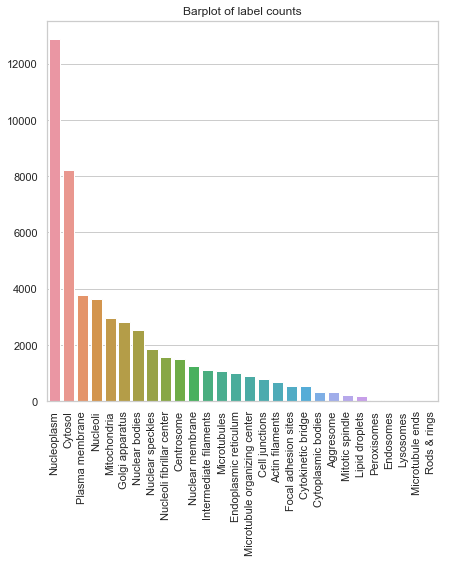

In [208]:
plt.figure(figsize=(7,7))
plt.title("Barplot of label counts")
sns.barplot(x=df_train_labels[labeled_columns].sum(0).sort_values(ascending=False).index,
           y=df_train_labels[labeled_columns].sum(0).sort_values(ascending=False))
plt.xticks(rotation=90);

### Huge differences in the label. Have to come up with appropiate sampeling strategy. Going to try a combination of undersampling high count labels and artificial increasing amoung of samples for low count labels (i.e. image augmentation)

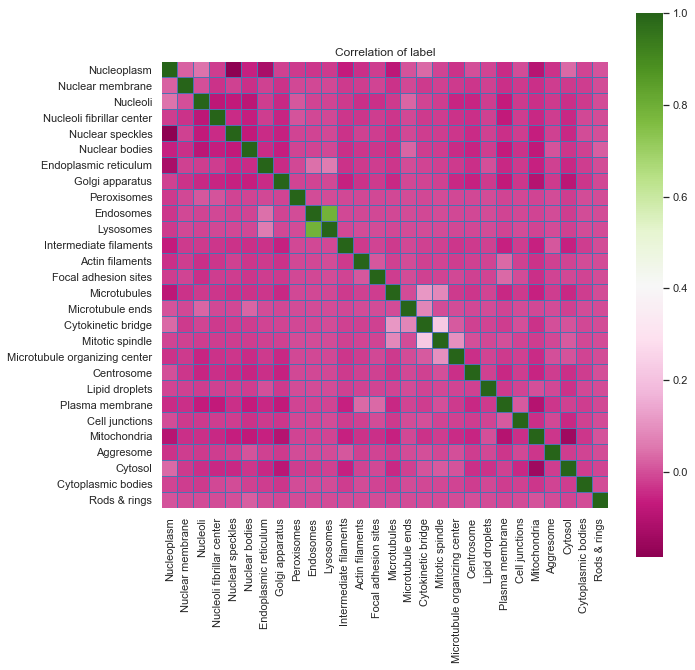

In [226]:
plt.figure(figsize=(10,10))
plt.title("Correlation of label")
sns.heatmap(df_train_labels[labeled_columns].corr(), cmap="PiYG", linewidths=.05,
           linecolor='b',square=True)